# **Atividade 0: Brincando com Spikes**

### Introdução à Neurociência Computacional - Prof. Bóris Marin

#### **Aquecimento**

#### 0) Reproduza a figura 5B do artigo clássico de Adrian e Zotterman, que dá a resposta (em termos da frequência de disparos) de um receptor de estiramento muscular, em função da carga aplicada. O que você pode concluir deste gráfico? Os dados em questão são:

Text(0.5, 1.0, 'Experimento do Lord Adrian (1926)')

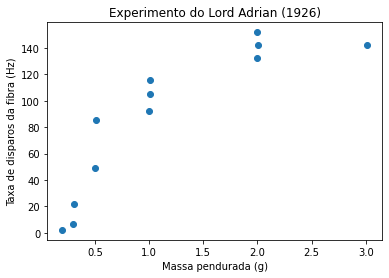

In [1]:
import matplotlib.pyplot as plt 

 
massas = [0.20, 0.30, 0.31, 0.50, 0.51, 1.01, 1.01, 1.00, 2.00, 2.01, 2.00, 3.01] 
taxas = [2.15, 6.80, 21.86, 49.09, 85.45, 115.97, 105.06, 92.07 , 151.81, 141.94, 132.59, 142.46]

plt.plot(massas, taxas, 'o')  
                             
                             
plt.ylabel('Taxa de disparos da fibra (Hz)') 
plt.xlabel("Massa pendurada (g)") 
plt.title("Experimento do Lord Adrian (1926)") 

**Conclusões:**

Podemos perceber que a taxa de disparo da fibra de um receptor de estiramento muscular aumenta segundo o aumento da carga aplicada, como já se era esperado.



#### **Trabalhando com Dados**

Trabalharemos agora com séries temporais para o potencial de membrana de determinada célula para um
experimento similar ao do item anterior, disponibilizadas juntamente com este enunciado no Moodle, ou [neste
link](https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/i_V_pyr1.dat). Em cada linha do arquivo de dados, a primeira coluna representa o estímulo aplicado (analogamente
à massa nos experimentos de Adrian, mas neste caso uma corrente injetada na célula, em pA), enquanto
as colunas subsequentes contêm os valores do potencial de membrana (mV) para cada instante de tempo
adquirido no experimento (duração total: 2s). Mais detalhes podem ser vistos no [conjunto original de dados](https://www.zenodo.org/record/17794#.W5j7lBQnYYM).

#### 1) Construa gráficos de algumas das séries temporais para explorar o conjunto de dados. O que podemos concluir acerca destes experimentos?

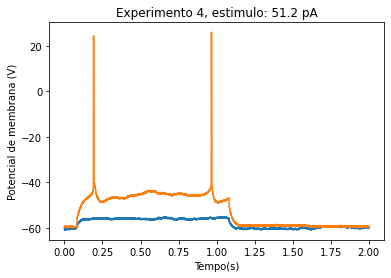

In [2]:
import numpy as np 

dados = np.genfromtxt("https://raw.githubusercontent.com/borismarin/sample-data/master/neuro-comp/i_V_pyr1.dat")


def faz_grafico(qual):
  
  experimento = dados[qual] 
  estimulo = experimento[0] 
  v_experimento =  experimento[1:] 
  tempo = np.arange(len(v_experimento))/10000  
  #plt.figure() 
  plt.plot(tempo, v_experimento)  
  plt.xlabel('Tempo(s)') 
  plt.ylabel('Potencial de membrana (V)') 
  plt.title(f'Experimento {qual}, estimulo: {round(estimulo, 2)} pA')  

faz_grafico(1) 
faz_grafico(4) 

Vamos agora chamar a função definida acima várias, uma para cada experimento. Desta forma, teremos séries temporais de todos os experimentos sobrepostas.
Isso parece útil?

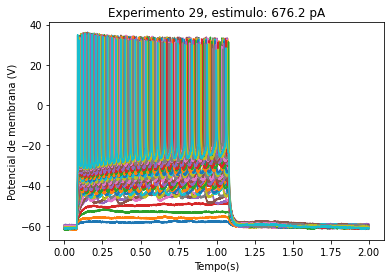

In [ ]:
for n_exp in range(len(dados)):  
    plt.figure() 
    faz_grafico(n_exp) 

**Conclusões:** 

Com base nos gráficos, podemos ver que os potenciais de membrana possuem um período similar mais ativo (por volta de 1 segundo), antes de cair novamente, tendo certos momentos de pico. O gráfico com todos os experimentos sobrepostos pode ser útil para nos ajudar a identificar similaridades entre os experimentos.

#### 2) Construa um *raster plot* que permita visualizar todos os dados simultaneamente. Fica mais fácil de justificar o item anterior?


**Dica:** Antes de começar a responder a essa pergunta reflita sobre o que é um *raster plot* e o que é necessário extrair de uma série temporal para gerar um *raster plot*.

In [3]:
def acha_spikes(experimento, limiar = 0): 
  
  spikes = [] 
  for i in range(len(experimento) - 1): 
                                         
                                        
    if experimento[i] <= limiar and experimento[i+1] > limiar: 
      spikes.append(i) 
      #print('cruzou o zero')
  return spikes

Frequência: 0 (Hz)
Frequência: 0 (Hz)
Frequência: 0 (Hz)
Frequência: 0 (Hz)
Frequência: 2 (Hz)
Frequência: 3 (Hz)
Frequência: 5 (Hz)
Frequência: 9 (Hz)
Frequência: 11 (Hz)
Frequência: 13 (Hz)
Frequência: 14 (Hz)
Frequência: 16 (Hz)
Frequência: 17 (Hz)
Frequência: 19 (Hz)
Frequência: 20 (Hz)
Frequência: 22 (Hz)
Frequência: 23 (Hz)
Frequência: 23 (Hz)
Frequência: 24 (Hz)
Frequência: 25 (Hz)
Frequência: 25 (Hz)
Frequência: 26 (Hz)
Frequência: 27 (Hz)
Frequência: 27 (Hz)
Frequência: 28 (Hz)
Frequência: 28 (Hz)
Frequência: 28 (Hz)
Frequência: 28 (Hz)
Frequência: 29 (Hz)
Frequência: 29 (Hz)


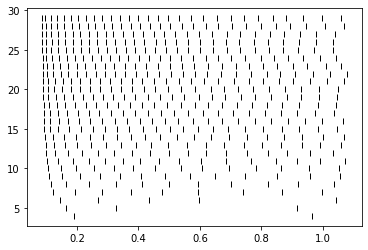

In [4]:
def faz_raster(dados):
  
  for i in range(len(dados)): 
    estimulo = dados[i][0] 
    v = dados[i][1:] 
    tempo = np.arange(len(v))/10000 
    spikes = acha_spikes(v, 0) 
    plt.plot(tempo[spikes], i * np.ones(len(spikes)), '|k') 

    print(f'Frequência: {len(spikes)} (Hz)') 

faz_raster(dados) 

**Conclusões:** 

Diria que facilita justificar o item anterior, pois nos permite identificar as altas da frequência junto do tempo, mostrando os picos visto nos gráficos do exercício anterior.

#### 3) Construa um gráfico análogo àquele do item zero (frequência de disparo × intensidade do estímulo).

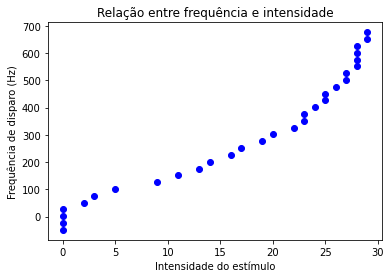

In [15]:
def new_graph(dados): 
  for i in range (len(dados)):
      estimulo = dados[i][0]
      potmem = dados[i][1:]
      tempo = np.arange(len(potmem))/10000
      spikes = acha_spikes (potmem, 0)
      frequencia = len(spikes)

      plt.plot (frequencia, estimulo, 'ob')

  plt.ylabel ("Frequência de disparo (Hz)")
  plt.xlabel ("Intensidade do estímulo")
  plt.title ("Relação entre frequência e intensidade")

new_graph(dados)


**Conclusões:** 

Podemos concluir que a frequência de disparo aumenta segundo a intensidade do estímulo, algo que segue em linha com o que vimos no gráfico da questão 0.